In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
import seaborn as sns

**FIGURE COEFFICIENTS**

In [2]:
# load data and show non zero coefficients
coef = pd.read_excel('coef_lasso_loocv_allS.xlsx').rename(columns = {"Unnamed: 0" : "Feature"})
coef.loc[:, ('abs')] = coef.apply(lambda row: abs(row.coefficient) ,axis = 1)
non_zero = [item for item in coef.sort_values(['abs'], ascending = False)[coef.coefficient != 0].set_index('Feature').index]
print(non_zero)

# transpose data and get non-zero coefficients for the figure
coef = coef.drop(columns = ['coefficient', 'std', 'abs']).set_index('Feature')
coef = coef.transpose()[non_zero].rename(columns = {'gender_F' : 'sex_F'})
coef

['lh_parstriangularis_volume', 'Right-Thalamus-Proper', 'gender_F', 'Caudate', 'rh_postcentral_volume', 'lh_entorhinal_volume', 'lh_fusiform_volume', 'RANDOM', 'rh_transversetemporal_volume', 'lh_parahippocampal_volume', 'CC_Central', 'lh_superiorparietal_volume', 'lh_lingual_volume', 'rh_rostralanteriorcingulate_volume', 'lh_inferiorparietal_volume', 'rh_entorhinal_volume', 'age_mri']


C:\Users\Esra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Feature  lh_parstriangularis_volume  Right-Thalamus-Proper     sex_F  \
0                          0.059614               0.024614  0.015575   
1                          0.000000               0.000000  0.000000   
2                          0.064974               0.033011  0.013777   
3                          0.038730               0.000000  0.011214   
4                          0.066043               0.034115  0.013180   
..                              ...                    ...       ...   
154                        0.000000               0.000000  0.000000   
155                        0.000000               0.000000  0.000000   
156                        0.000000               0.000000  0.000000   
157                        0.000000               0.000000  0.000000   
158                        0.000000               0.000000  0.000000   

Feature   Caudate  rh_postcentral_volume  lh_entorhinal_volume  \
0        0.018740                    0.0                   0.0   
1        0.000000                    0.0                   0.0   
2        0.005852                    0.0                   0.0   
3        0.000000                    0.0                   0.0   
4        0.006854                    0.0                   0.0   
..            ...                    ...                   ...   
154      0.000000                    0.0                   0.0   
155      0.000000                    0.0                   0.0   
156      0.000000                    0.0                   0.0   
157      0.000000                    0.0                   0.0   
158      0.000000                    0.0                   0.0   

Feature  lh_fusiform_volume  RANDOM  rh_transversetemporal_volume  \
0                       0.0     0.0                           0.0   
1                       0.0     0.0                           0.0   
2                       0.0     0.0                           0.0   
3                       0.0     0.0                           0.0   
4                       0.0     0.0                           0.0   
..                      ...     ...                           ...   
154                     0.0     0.0                           0.0   
155                     0.0     0.0                           0.0   
156                     0.0     0.0                           0.0   
157                     0.0     0.0                           0.0   
158                     0.0     0.0                           0.0   

Feature  lh_parahippocampal_volume  CC_Central  lh_superiorparietal_volume  \
0                              0.0         0.0                         0.0   
1                              0.0         0.0                         0.0   
2                              0.0         0.0                         0.0   
3                              0.0         0.0                         0.0   
4                              0.0         0.0                         0.0   
..                             ...         ...                         ...   
154                            0.0         0.0                         0.0   
155                            0.0         0.0                         0.0   
156                            0.0         0.0                         0.0   
157                            0.0         0.0                         0.0   
158                            0.0         0.0                         0.0   

Feature  lh_lingual_volume  rh_rostralanteriorcingulate_volume  \
0                      0.0                                 0.0   
1                      0.0                                 0.0   
2                      0.0                                 0.0   
3                      0.0                                 0.0   
4                      0.0                                 0.0   
..                     ...                                 ...   
154                    0.0                                 0.0   
155                    0.0                      

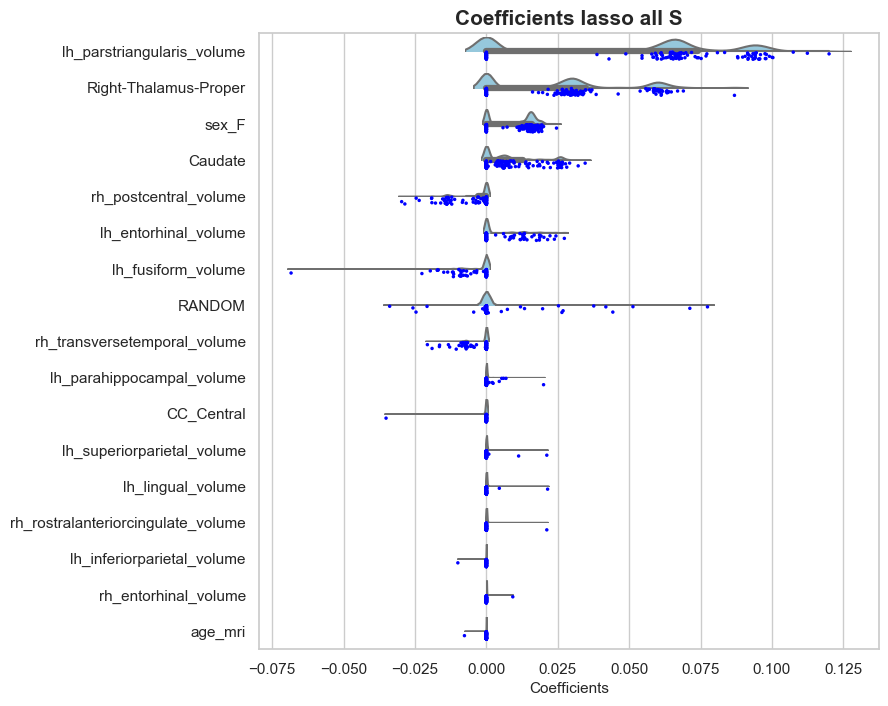

In [37]:
# make figure
sns.reset_defaults()
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

ax = sns.violinplot(data = coef,  orient = 'h', scale = 'width',  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

old_len_collections = len(ax.collections)
sns.stripplot(data = coef, orient = 'h', ax = ax, size = 2.5, color = 'blue').set(ylabel = None)

for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Coefficients", fontsize = 11)
ax.set_title("Coefficients lasso all S", fontsize = 15, fontweight = 'bold')

plt.savefig("coef_violin_allS.png", bbox_inches="tight")
plt.show()

**FIGURE PERMUTATION IMPORTANCE**

In [10]:
# load data
perm_imp = pd.read_excel('RF_LOOCV_perm_importance_allS.xlsx').rename(columns = {"Unnamed: 0" : "Feature"})
perm_imp = perm_imp.sort_values(['importance'], ascending = False).set_index('Feature').drop(columns = ['importance', 'std']).head(16)
perm_imp = perm_imp.transpose()
perm_imp

Feature  lh_parstriangularis_volume  Left-Pallidum  lh_postcentral_volume  \
0                          0.002608       0.001771               0.000662   
1                          0.002396       0.001970               0.000640   
2                          0.002565       0.002250               0.000602   
3                          0.002687       0.002070               0.000644   
4                          0.002910       0.002249               0.000628   
..                              ...            ...                    ...   
154                        0.003171       0.001636               0.000649   
155                        0.003173       0.002037               0.000700   
156                        0.002635       0.002053               0.000691   
157                        0.002854       0.001988               0.000730   
158                        0.002816       0.001953               0.000681   

Feature  rh_postcentral_volume  lh_fusiform_volume  \
0                     0.000462            0.000429   
1                     0.000449            0.000417   
2                     0.000639            0.000360   
3                     0.000501            0.000453   
4                     0.000414            0.000424   
..                         ...                 ...   
154                   0.000442            0.000489   
155                   0.000481            0.000443   
156                   0.000450            0.000402   
157                   0.000416            0.000424   
158                   0.000432            0.000526   

Feature  rh_parstriangularis_volume  Right-Thalamus-Proper   Caudate  \
0                          0.000470               0.000450  0.000396   
1                          0.000410               0.000439  0.000402   
2                          0.000387               0.000521  0.000362   
3                          0.000388               0.000457  0.000338   
4                          0.000396               0.000486  0.000327   
..                              ...                    ...       ...   
154                        0.000496               0.000353  0.000302   
155                        0.000397               0.000445  0.000349   
156                        0.000385               0.000361  0.000370   
157                        0.000403               0.000423  0.000357   
158                        0.000378               0.000385  0.000367   

Feature  lh_entorhinal_volume  lh_superiorparietal_volume  Right-Amygdala  \
0                    0.000333                    0.000337        0.000304   
1                    0.000327                    0.000417        0.000289   
2                    0.000318                    0.000393        0.000243   
3                    0.000320                    0.000330        0.000283   
4                    0.000390                    0.000417        0.000320   
..                        ...                         ...             ...   
154                  0.000360                    0.000249        0.000258   
155                  0.000357                    0.000287        0.000259   
156                  0.000362                    0.000273        0.000232   
157                  0.000342                    0.000264        0.000301   
158                  0.000332                    0.000267        0.000253   

Feature  lh_bankssts_volume  Left-Amygdala  Right-Pallidum  \
0                  0.000202       0.000221        0.000221   
1                  0.000204       0.000244        0.000218   
2                  0.000237       0.000160        0.000220   
3                  0.000212       0.000234        0.000244   
4                  0.000211       0.000220        0.000221   
..                      ...            ...             ...   
154                0.000275       0.000243        0.000229   
155                0.000236       0.000262        0.000242   
156                0.000245       0.000253        0.000208   
157             

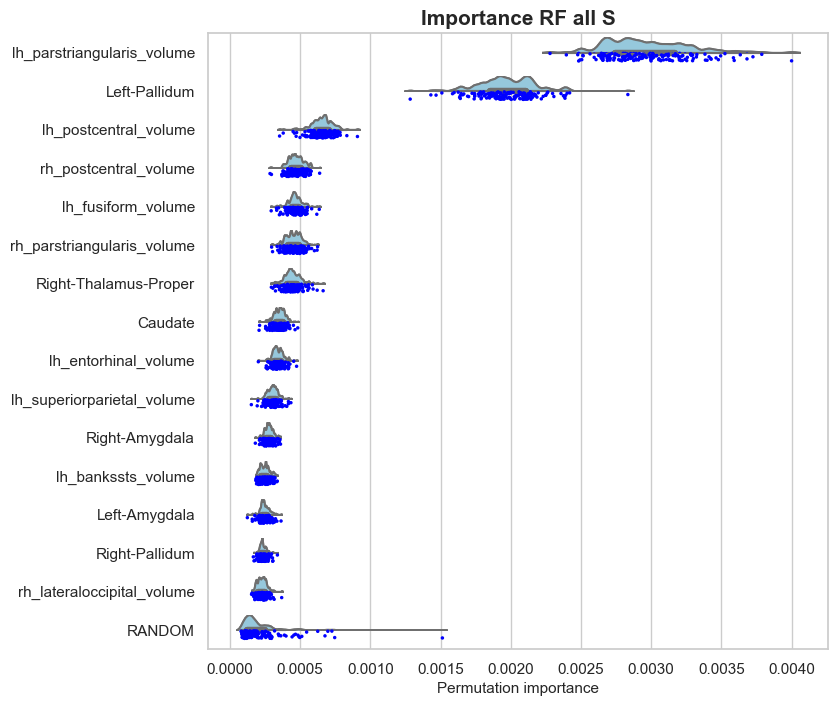

In [36]:
# make figure
sns.reset_defaults()
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

ax = sns.violinplot(data = perm_imp,  orient = 'h', scale = 'width',  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

old_len_collections = len(ax.collections)
sns.stripplot(data = perm_imp, orient = 'h', ax = ax, size = 2.5, color = 'blue').set(ylabel = None)

for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Permutation importance", fontsize = 11)
ax.set_title("Importance RF all S", fontsize = 15, fontweight = 'bold')


plt.savefig("perm_imp_violin_allS.png", bbox_inches="tight")
plt.show()